In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Make multi-modal data

In [29]:
nrows = 10000
ncols = 2

In [30]:
def make_dist(n_centers = 3, print_=True, plot=True, seed=None):    
    if seed:
        np.random.seed(seed)
    means = np.random.randint(-20, 20, (n_centers, ncols))
    covs = np.random.randint(1, 5, (n_centers, ncols, ncols) )
    for i in range(n_centers):
        covs[i] = np.dot(covs[i], covs[i].T)
    ar = np.zeros((nrows, ncols))
    for i in range(nrows):
        h = np.random.choice(n_centers)
        rand_mean, rand_cov = means[h], covs[h]
        ar[i,:] = np.random.multivariate_normal(rand_mean, rand_cov)  
    if print_:
        print 'means='
        print means
        print 'covs='
        print covs
    if plot:
        if ncols>2:
            print 'can only plot 2d histograms'
        else:
            plt.hist2d(ar[:,0], ar[:,1], bins=(50,50));
    return ar

means=
[[ 16 -14]
 [ 14   3]
 [ -6   4]]
covs=
[[[18 15]
  [15 17]]

 [[17 14]
  [14 13]]

 [[ 5  9]
  [ 9 17]]]


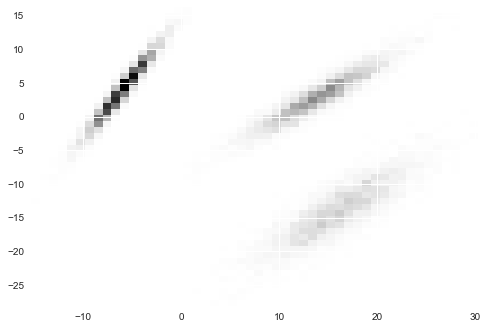

In [33]:
ar = make_dist(n_centers=3, print_=True, plot=True)

# sklearn K-means

In [34]:
from sklearn.cluster import KMeans

In [37]:
km = KMeans(n_clusters=3)

In [44]:
for _ in range(10):
    km.fit(ar)
    print km.cluster_centers_
    print "-"*10

[[ -5.94274183   3.91796515]
 [ 16.00566318 -14.00942357]
 [ 14.19932743   2.94403838]]
----------
[[ 16.00717271 -14.01454377]
 [ 14.19583744   2.93637862]
 [ -5.94559546   3.92080442]]
----------
[[ -5.94274183   3.91796515]
 [ 16.00566318 -14.00942357]
 [ 14.19932743   2.94403838]]
----------
[[ 14.20452539   2.93951237]
 [ 16.00136228 -14.01515824]
 [ -5.94274183   3.91796515]]
----------
[[ -5.94559546   3.92080442]
 [ 14.18975749   2.94079851]
 [ 16.01238412 -14.00870237]]
----------
[[ 14.19932743   2.94403838]
 [ -5.94274183   3.91796515]
 [ 16.00566318 -14.00942357]]
----------
[[ 16.00938374 -14.01166744]
 [ -5.94274183   3.91796515]
 [ 14.19628789   2.94117663]]
----------
[[ 16.00136228 -14.01515824]
 [ -5.94274183   3.91796515]
 [ 14.20452539   2.93951237]]
----------
[[ 16.00566318 -14.00942357]
 [ -5.94274183   3.91796515]
 [ 14.19932743   2.94403838]]
----------
[[ 16.00566318 -14.00942357]
 [ -5.94274183   3.91796515]
 [ 14.19932743   2.94403838]]
----------


# K-Means

In [39]:
def k_means(ar, n_means=2, seed=None):
    if seed:
        np.random.seed(seed)
        
    def inner_k():
        means = np.random.randint(np.min(ar), np.max(ar), (n_means, ar.shape[1]))
        new_means = np.empty_like(means, dtype=np.float64)
        es = np.empty((ar.shape[0], n_means))
        cond=True
        while cond:
            for i in range(n_means):
                es[:,i] = (np.sqrt((ar - means[i])**2)).sum(axis=1)
            closest_mean = es.argmin(axis=1)
            for i in range(n_means):
                new_means[i] = ar[closest_mean==i,:].mean(axis=0)
            z = ((new_means - means)**2).sum()>1e-16
            means = new_means
            cond = z
        return means
    
    bad_mean=True
    while bad_mean:
        means = inner_k()
        bad_mean = np.isnan(means).any()
    return means
    

In [41]:
for _ in range(10):
    print k_means(ar, n_means=3, seed=None)
    print "--"

[[ 15.0387411   -5.36938843]
 [ -3.38870414   8.84122809]
 [ -7.11237732   1.9337468 ]]
--
[[ -1.65408335  10.20549795]
 [ 16.13396207 -13.86229193]
 [  4.55578227   2.80114835]]
--
[[ 16.14352274 -13.86267788]
 [ -7.52363925   1.24077492]
 [  8.73804218   4.39453563]]
--
[[ -6.42097768   3.14419009]
 [ 11.8479637    7.30656401]
 [ 14.77023953  -7.41618556]]
--
[[ 15.89693021 -13.93147965]
 [ 19.4348527    6.53294169]
 [  1.67686043   2.93140367]]
--
[[ -6.0059254    3.99412461]
 [ 15.30678375   0.79024273]
 [ 14.59368696 -15.51387189]]
--
[[ 16.60922357   1.88482655]
 [ 14.89917011 -15.253025  ]
 [ -3.45535154   2.9745202 ]]
--
[[-11.18055158  -5.96270632]
 [ -5.86392438   4.25353205]
 [ 15.03937983  -5.3654777 ]]
--
[[ -6.0031412    3.99907722]
 [ 14.18086504   2.81824288]
 [ 15.93902491 -14.07829678]]
--
[[ 18.36398673  -0.02273087]
 [ 12.52250298  -9.41001935]
 [ -6.0059254    3.99412461]]
--


/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: Mean of empty slice.
  from ipykernel import kernelapp as app
